In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('practice.csv')

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.shape

(8693, 14)

In [5]:
data.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [6]:
data.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [7]:
data.mode()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Earth,False,G/734/S,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,Alraium Disivering,True
1,0002_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ankalik Nateansive,NaN
2,0003_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anton Woody,NaN
3,0003_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apix Wala,NaN
4,0004_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asch Stradick,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8689,9278_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8690,9279_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8691,9280_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Most occuring value in column 2
data['HomePlanet'].mode()

0    Earth
Name: HomePlanet, dtype: object

In [9]:
#Most occuring value in column 5
data.Destination.mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [10]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
#Handling passenger id information(before_corresponds to group and after _ corresponds to no.of people)
def passenger_id_feature(data):
    data['Group']=data['PassengerId'].apply(lambda x:x.split("_")[0])
    data['People']=data['PassengerId'].apply(lambda x:x.split('_')[1])

In [13]:
#Decoding information from cabin column
def cabin_feature(data):
    data['Cabin'].fillna("np.nan/np.nan/np.nan",inplace=True)
    data['Cabin_Deck']= data['Cabin'].apply(lambda x: x.split("/")[0])
    data['Cabin_Number']=data['Cabin'].apply(lambda x:x.split("/")[1])
    data['Cabin_Side']=data['Cabin'].apply(lambda x:x.split("/")[2])
    cols = ['Cabin_Deck','Cabin_Number','Cabin_Side']
    data[cols]=data[cols].replace("np.nan",np.nan)

In [14]:
cabin_feature(data)

In [15]:
passenger_id_feature(data)

In [16]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004,01


In [17]:
data.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Cabin_Deck    8494 non-null   object 
 13  Cabin_Number  8494 non-null   object 
 14  Cabin_Side    8494 non-null   object 
 15  Group         8693 non-null   object 
 16  People        8693 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


In [19]:
#Converting cabin no , group, people to numeric value
data[['Cabin_Number','Group']] = data[['Cabin_Number','Group']].apply(pd.to_numeric)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Cabin_Deck    8494 non-null   object 
 13  Cabin_Number  8494 non-null   float64
 14  Cabin_Side    8494 non-null   object 
 15  Group         8693 non-null   int64  
 16  People        8693 non-null   object 
dtypes: bool(1), float64(7), int64(1), object(8)
memory usage: 1.1+ MB


In [21]:
#Function to fill NAN values
def fill_nan(data,columns):
    for col in columns:
        if data[col].dtype in ['object','bool']:
            data[col].fillna(data[col].mode()[0],inplace=True)
        elif data[col].dtype in ['int64','float64']:
            data[col].fillna(data[col].mean(),inplace=True)

In [22]:
cols=data.columns
cols

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'Cabin_Deck', 'Cabin_Number', 'Cabin_Side', 'Group', 'People'],
      dtype='object')

In [23]:
fill_nan(data,cols)

In [24]:
#Another brute force way to fill NAN Values
# data['HomePlanet'].fillna('Earth',inplace=True)
# data['CryoSleep'].fillna(False,inplace=True)
# data['Destination'].fillna('TRAPPIST-1e',inplace=True)
# data['Age'].fillna(data['Age'].mean(),inplace=True)
# data['VIP'].fillna(False,inplace=True)
# data['RoomService'].fillna(data['RoomService'].mean(),inplace=True)
# data['FoodCourt'].fillna(data['FoodCourt'].mean(),inplace=True)
# data['ShoppingMall'].fillna(data['ShoppingMall'].mean(),inplace=True)
# data['Spa'].fillna(data['Spa'].mean(),inplace=True)
# data['VRDeck'].fillna(data['VRDeck'].mean(),inplace=True)


In [25]:
data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Cabin_Deck      0
Cabin_Number    0
Cabin_Side      0
Group           0
People          0
dtype: int64

In [26]:
#Function for univariate plotting
def univariate_plot(data,columns,plot):
    plt.figure(figsize=(20,20))
    for i in enumerate(data[columns]):
        plt.subplot(len(columns)//2,len(columns)//2,i[0]+1)
        plot(x=data[i[1]])

In [27]:
#Handling Numeric Data

In [28]:
num_cols=[col for col in data.columns if data[col].dtype in ['int64','float64']]

In [29]:
num_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin_Number',
 'Group']

In [30]:
import seaborn as sns

C:\Users\NCS\AppData\Local\Temp\ipykernel_5636\3373162374.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot(x=data[i[1]])
C:\Users\NCS\AppData\Local\Temp\ipykernel_5636\3373162374.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot(x=data[i[1]])
C:\Users\NCS\AppData\Local\Temp\ipykernel_5636\3373162374.py:6: 

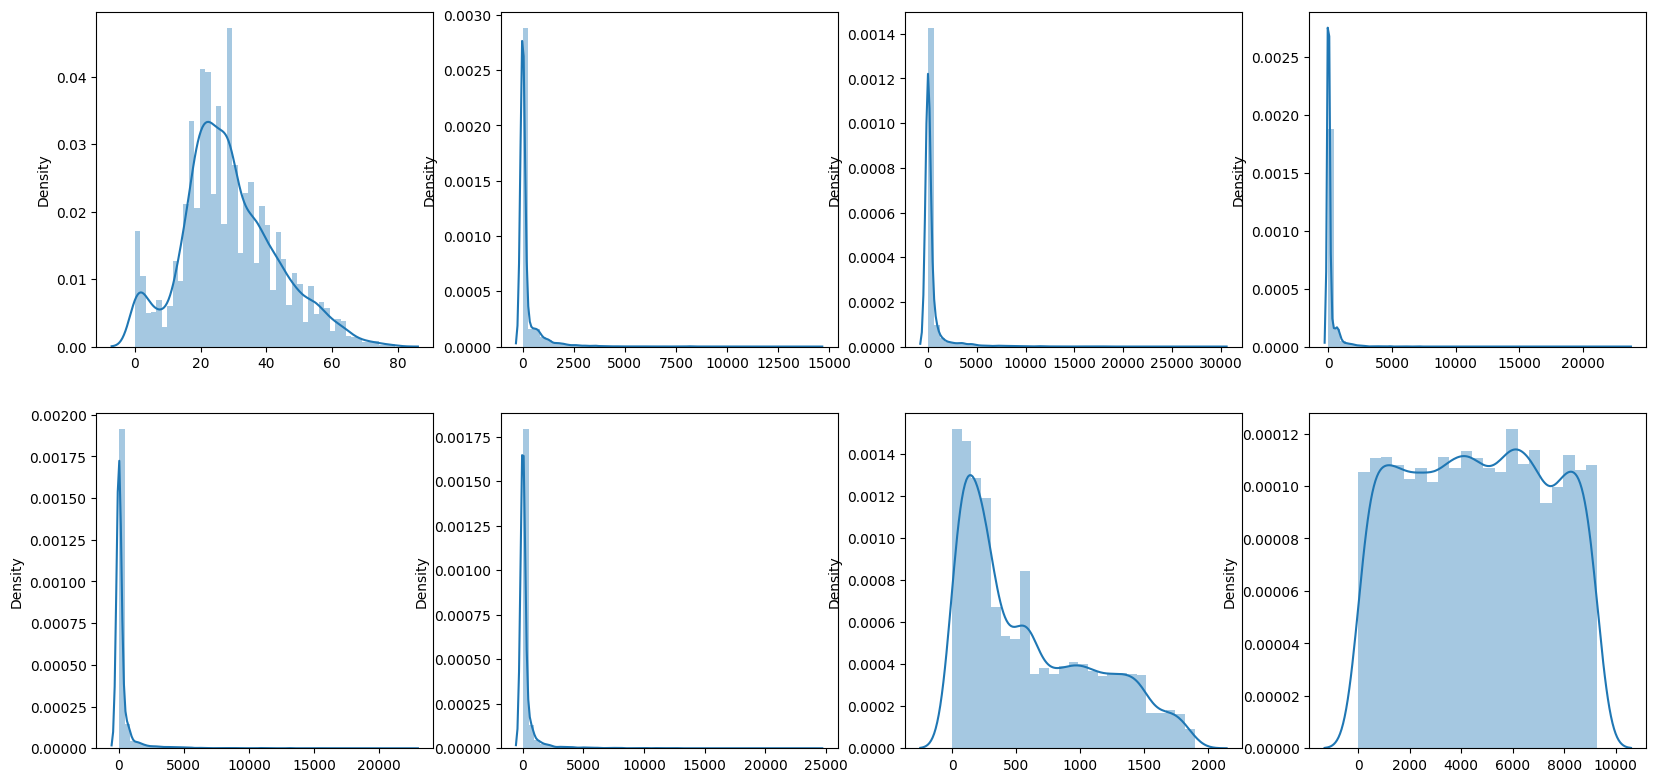

In [31]:
univariate_plot(data,num_cols,sns.distplot)

In [32]:
def log_transform(data,columns):
    for col in columns:
        data[col]=np.log1p(data[col])

In [33]:
expenses=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [34]:
#log_transform(data,expenses)

C:\Users\NCS\AppData\Local\Temp\ipykernel_5636\3373162374.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot(x=data[i[1]])
C:\Users\NCS\AppData\Local\Temp\ipykernel_5636\3373162374.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot(x=data[i[1]])
C:\Users\NCS\AppData\Local\Temp\ipykernel_5636\3373162374.py:6: 

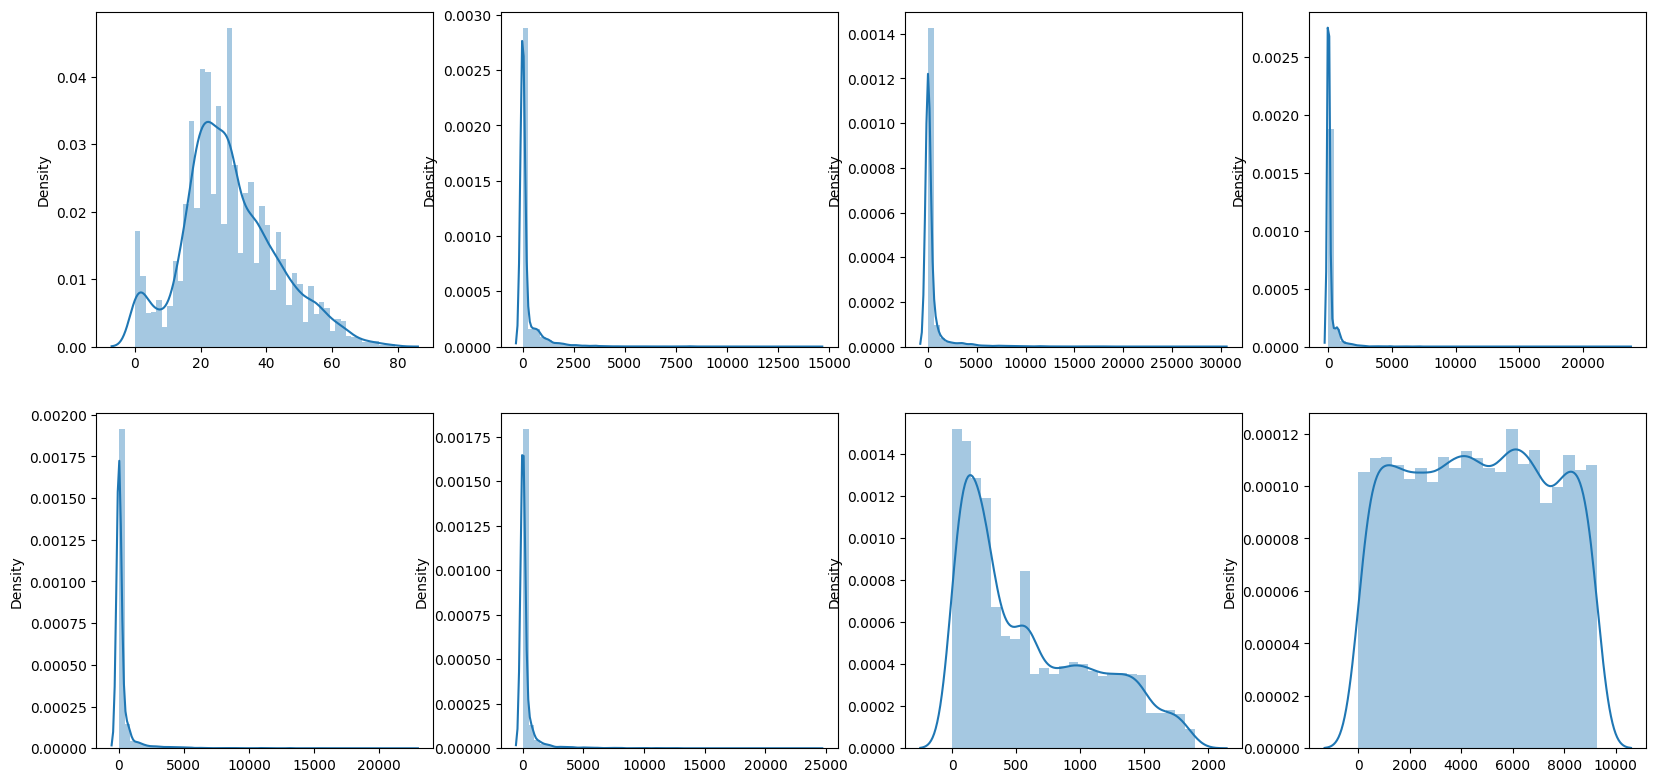

In [35]:
univariate_plot(data,num_cols,sns.distplot)

In [36]:
data_num=pd.DataFrame(data=data,columns=num_cols)

In [37]:
data_num['Transported']=data['Transported']

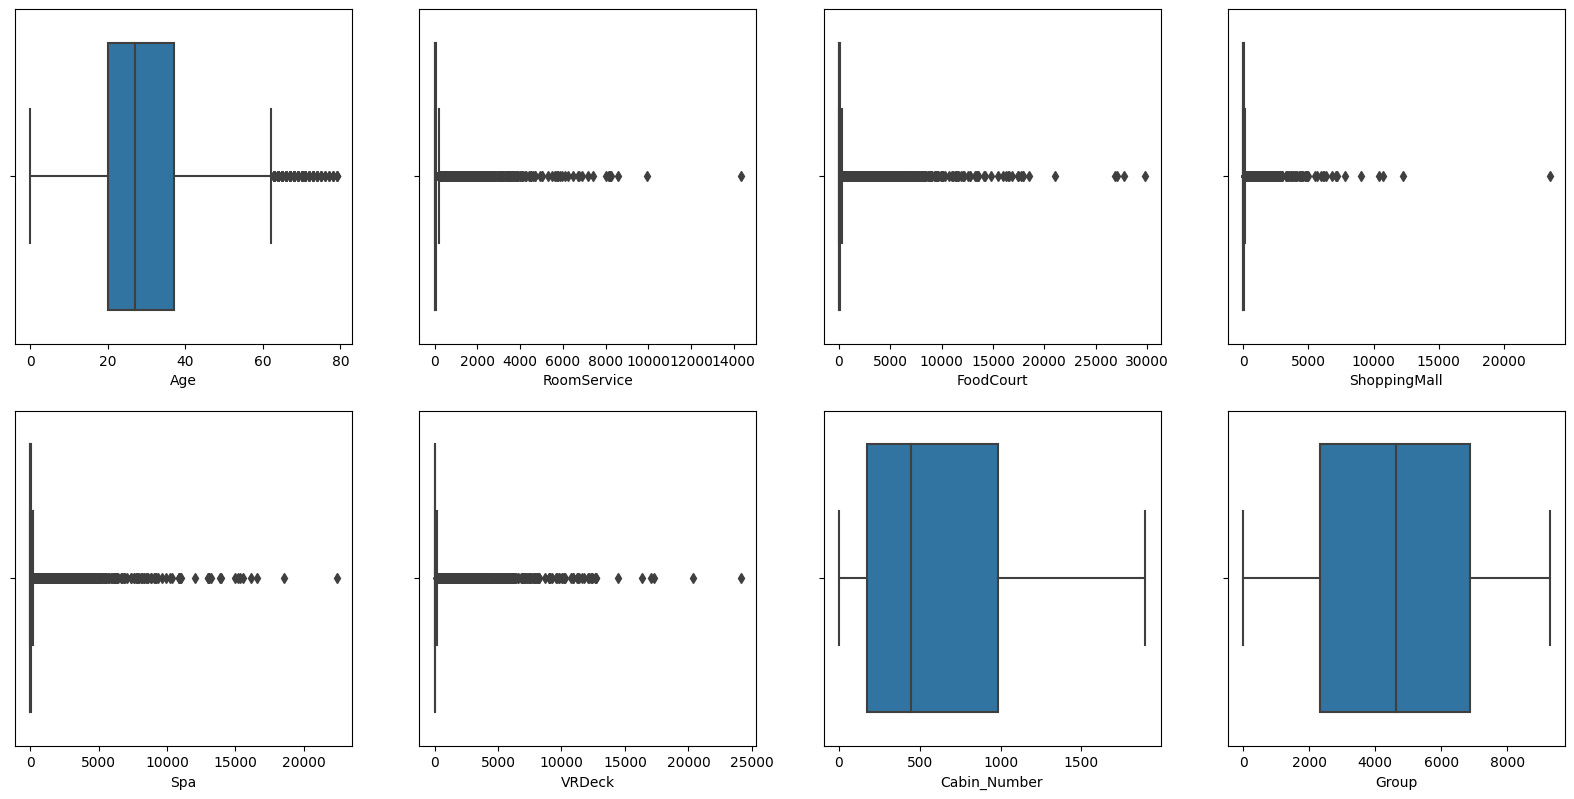

In [38]:
univariate_plot(data,num_cols,sns.boxplot)

In [39]:
y=data['Transported']

In [40]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,1,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,2,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,3,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,3,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,4,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P,9276,01
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S,9278,01
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S,9279,01
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S,9280,01


In [41]:
data.CryoSleep.unique()


array([False,  True])

In [42]:
data.VIP.unique()

array([False,  True])

In [43]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cols={'HomePlanet','Destination','Cabin_Deck','Cabin_Side','People'}
for col in cols:
    data[col]=le.fit_transform(data[col])
    print(le.classes_)

['P' 'S']
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']
['Earth' 'Europa' 'Mars']
['01' '02' '03' '04' '05' '06' '07' '08']


In [44]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,0,1,0
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0.0,1,2,0
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0.0,1,3,0
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0.0,1,3,1
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1.0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,98.0,0,9276,0
8689,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,6,1499.0,1,9278,0
8690,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,6,1500.0,1,9279,0
8691,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4,608.0,1,9280,0


In [45]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,0,1,0
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0.0,1,2,0
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0.0,1,3,0
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0.0,1,3,1
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1.0,1,4,0


In [46]:
cryosleep=pd.get_dummies(data['CryoSleep'],drop_first=True)
vip=pd.get_dummies(data['VIP'],drop_first=True)

In [47]:
vip.rename(columns={True:'VIP'},inplace=True)

In [48]:
cryosleep.rename(columns={True:'CryoSleep'},inplace=True)

In [49]:
cryosleep

,CryoSleep
0,0
1,0
2,0
3,0
4,0
...,...
8688,0
8689,1
8690,0
8691,0


In [50]:
vip

,VIP
0,0
1,0
2,1
3,0
4,0
...,...
8688,1
8689,0
8690,0
8691,0


In [51]:
#y=pd.get_dummies(data['Transported'],drop_first=True)

In [52]:
#y.rename(columns={True:'Transported'},inplace=True)

In [53]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,0,1,0
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0.0,1,2,0
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0.0,1,3,0
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0.0,1,3,1
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1.0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,98.0,0,9276,0
8689,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,6,1499.0,1,9278,0
8690,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,6,1500.0,1,9279,0
8691,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4,608.0,1,9280,0


In [54]:
data.drop(['VIP','CryoSleep','Name'],axis=1,inplace=True)

In [55]:
data=pd.concat([data,vip],axis=1)

In [56]:
data=pd.concat([data,cryosleep],axis=1)

In [57]:
data.head()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People,VIP,CryoSleep
0,1,2,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0.0,0,1,0,0,0
1,0,2,24.0,109.0,9.0,25.0,549.0,44.0,True,5,0.0,1,2,0,0,0
2,1,2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0.0,1,3,0,1,0
3,1,2,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0.0,1,3,1,0,0
4,0,2,16.0,303.0,70.0,151.0,565.0,2.0,True,5,1.0,1,4,0,0,0


In [58]:
y=data['Transported']

In [59]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [60]:
data.drop(['Transported'],axis=1,inplace=True)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler

In [62]:
x_train,x_test,y_train,y_test= train_test_split(data,y,test_size=0.2,random_state=42)

In [63]:

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
    

In [64]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred= lr.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_pred,y_test)

0.7699827487061529

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier() #n_estimators=5 =>5 Decision Trees
clf.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_pred_rf= clf.predict(x_test)

In [70]:
accuracy_score(y_pred_rf,y_test)

0.79700977573318

In [71]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [72]:
random_grid_rfc = {
                'n_estimators': [10,20,30,40,50,100,150,200,500],
                'max_depth': [5, 7, 9, 11, 15],
                }

In [73]:

from sklearn.model_selection import cross_val_score,RandomizedSearchCV

In [74]:
random_search_clf =RandomizedSearchCV(clf,random_grid_rfc, cv=5, n_jobs=-1)

In [75]:
random_search_clf.fit(x_train,y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 15],
                                        'n_estimators': [10, 20, 30, 40, 50,
                                                         100, 150, 200, 500]})

In [76]:
best_params_rfc=random_search_clf.best_params_
best_params_rfc

{'n_estimators': 200, 'max_depth': 15}

In [77]:
model_rfc=RandomForestClassifier(**best_params_rfc)

In [78]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [79]:
x_train_predictions_rfc=model_rfc.predict(x_train)


In [80]:
x_test_predictions_rfc=model_rfc.predict(x_test)

In [81]:
x_train_predictions_rfc

array([False, False,  True, ..., False, False, False])

In [82]:
accuracy_score(y_test,x_test_predictions_rfc)


0.7952846463484762

In [83]:
accuracy_score(y_train,x_train_predictions_rfc)

0.9759850445786598

In [84]:
test=pd.read_csv('test.csv')

In [85]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [86]:
df_submission=pd.DataFrame(test['PassengerId'])
df_submission_lr=pd.DataFrame(test['PassengerId'])

In [87]:
df_submission.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [88]:
test.drop(columns='Name',inplace=True)

In [89]:
cabin_feature(test)

In [90]:
passenger_id_feature(test)


In [91]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin             0
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_Deck      100
Cabin_Number    100
Cabin_Side      100
Group             0
People            0
dtype: int64

In [92]:
test.drop(columns=['PassengerId','Cabin'],inplace=True)

In [93]:
test[['Cabin_Number','Group']] = test[['Cabin_Number','Group']].apply(pd.to_numeric)

In [94]:
test_cols=test.columns

In [95]:
fill_nan(test,test_cols)

In [96]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_Deck      0
Cabin_Number    0
Cabin_Side      0
Group           0
People          0
dtype: int64

In [97]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3.0,S,13,01
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4.0,S,18,01
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0.0,S,19,01
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1.0,S,21,01
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5.0,S,23,01


In [98]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cols={'HomePlanet','Destination','Cabin_Deck','Cabin_Side','People'}
for col in cols:
    test[col]=le.fit_transform(test[col])
    print(le.classes_)

['P' 'S']
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']
['Earth' 'Europa' 'Mars']
['01' '02' '03' '04' '05' '06' '07' '08']


In [99]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People
0,0,True,2,27.0,False,0.0,0.0,0.0,0.0,0.0,6,3.0,1,13,0
1,0,False,2,19.0,False,0.0,9.0,0.0,2823.0,0.0,5,4.0,1,18,0
2,1,True,0,31.0,False,0.0,0.0,0.0,0.0,0.0,2,0.0,1,19,0
3,1,False,2,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,1.0,1,21,0
4,0,False,2,20.0,False,10.0,0.0,635.0,0.0,0.0,5,5.0,1,23,0


In [100]:
cryosleep_test=pd.get_dummies(test['CryoSleep'],drop_first=True)
vip_test=pd.get_dummies(test['VIP'],drop_first=True)

In [101]:
vip_test.rename(columns={True:'VIP'},inplace=True)

In [102]:
cryosleep_test.rename(columns={True:'CryoSleep'},inplace=True)

In [103]:
test.drop(['VIP','CryoSleep'],axis=1,inplace=True)

In [104]:
test=pd.concat([test,vip_test],axis=1)
test=pd.concat([test,cryosleep_test],axis=1)

In [106]:
data

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Number,Cabin_Side,Group,People,VIP,CryoSleep
0,1,2,39.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,0,0,0
1,0,2,24.0,109.0,9.0,25.0,549.0,44.0,5,0.0,1,2,0,0,0
2,1,2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1,3,0,1,0
3,1,2,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1,3,1,0,0
4,0,2,16.0,303.0,70.0,151.0,565.0,2.0,5,1.0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,98.0,0,9276,0,1,0
8689,0,1,18.0,0.0,0.0,0.0,0.0,0.0,6,1499.0,1,9278,0,0,1
8690,0,2,26.0,0.0,0.0,1872.0,1.0,0.0,6,1500.0,1,9279,0,0,0
8691,1,0,32.0,0.0,1049.0,0.0,353.0,3235.0,4,608.0,1,9280,0,0,0


In [107]:
x_test_kaggle=scaler.fit_transform(test)
    

In [108]:
pred_lr=lr.predict(x_test_kaggle)

In [109]:
x_test_predictions=model_rfc.predict(x_test_kaggle)

In [110]:
x_test_predictions

array([False, False,  True, ...,  True,  True, False])

In [111]:
df_submission["Transported"]=x_test_predictions

In [112]:
df_submission['Transported'].value_counts()

False    2330
True     1947
Name: Transported, dtype: int64

In [113]:
#df_submission.to_csv('1.csv',index=False)

In [115]:
df_submission_lr["Transported"]=pred_lr

In [116]:
df_submission_lr.to_csv('lr.csv',index=False)